In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = '/content/bank_iq.json'
data = None
with open(file, 'r') as f:
  data = json.load(f) 

channel_id, stats = data.popitem() 
print(channel_id)  
channel_stats = stats['channel_statistics']
video_stats = stats['video_data']


UCGXsku75ELWndSG7kEihspg


In [2]:
#video stats
sorted_videos = sorted(video_stats.items(), key=lambda item: int(item[1]['viewCount']), reverse=True)
stats = []
for vid in sorted_videos:
  video_id = vid[0]
  title = vid[1]['title']
  description = vid[1]['description']
  views = vid[1]['viewCount']
  likes = vid[1]['likeCount']
  dislikes = vid[1]['dislikeCount']
  comments = vid[1]['commentCount']
  publish_time = vid[1]['publishedAt']
  duration = vid[1]['duration']
  stats.append([title, description, views, likes, dislikes, comments, publish_time, duration])

In [3]:
df = pd.DataFrame(stats, columns=['title', 'description', 'views', 'likes', 'dislikes','comment', 'publish_time', 'duration'])

In [4]:
df.head()

,title,description,views,likes,dislikes,comment,publish_time,duration
0,Mini Mock Reasoning Set 320 for SBI PO / IBPS ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,17484,510,16,53,2020-01-01T12:30:12Z,PT12M44S
1,50 Important Puzzles Set 1 for SBI PO / IBPS P...,Subscribe to #BankIQ (A Study IQ Initiative) -...,12894,691,8,66,2019-04-28T12:19:12Z,PT15M21S
2,One Word Substitutes Previous Year Questions S...,Subscribe to #BankIQ (A Study IQ Initiative) -...,11129,429,6,13,2019-09-03T07:30:13Z,PT6M3S
3,Machine Input Output Reasoning Tricks Set 26 f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9789,274,8,10,2020-01-01T04:09:59Z,PT9M8S
4,28 August 2019 Daily Financial News Analysis f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9438,447,7,49,2019-08-30T15:24:38Z,PT17M34S


In [5]:
df.shape

(500, 8)

In [6]:
# Importing datetime library which provides great functions to handle date and time information
import datetime
i=0
for i in range(df.shape[0]):
    date_time_obj = datetime.datetime.strptime(df['publish_time'].at[i], '%Y-%m-%dT%H:%M:%SZ')
    df['publish_time'].at[i] = date_time_obj
    i = i+1

In [7]:
i=0
date=[]
time=[]
year=[]
month=[]
day=[]
for i in range(df.shape[0]):
    d = df['publish_time'][i].date();
    t = df['publish_time'][i].time();
    y = df['publish_time'][i].date().year;
    m = df['publish_time'][i].date().month;
    da = df['publish_time'][i].date().day;
    date.append(d) # Storing dates
    time.append(t) # Storing time
    year.append(y) # Storing years
    month.append(m) # Storing months
    day.append(da) # Storing days
    i = i+1
df.drop(['publish_time'], inplace=True,axis=1)
df['published_date']=date
df['published_time']=time
df['year']=year
df['month'] = month
df['day'] = day

In [8]:
df.head()

,title,description,views,likes,dislikes,comment,duration,published_date,published_time,year,month,day
0,Mini Mock Reasoning Set 320 for SBI PO / IBPS ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,17484,510,16,53,PT12M44S,2020-01-01,12:30:12,2020,1,1
1,50 Important Puzzles Set 1 for SBI PO / IBPS P...,Subscribe to #BankIQ (A Study IQ Initiative) -...,12894,691,8,66,PT15M21S,2019-04-28,12:19:12,2019,4,28
2,One Word Substitutes Previous Year Questions S...,Subscribe to #BankIQ (A Study IQ Initiative) -...,11129,429,6,13,PT6M3S,2019-09-03,07:30:13,2019,9,3
3,Machine Input Output Reasoning Tricks Set 26 f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9789,274,8,10,PT9M8S,2020-01-01,04:09:59,2020,1,1
4,28 August 2019 Daily Financial News Analysis f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9438,447,7,49,PT17M34S,2019-08-30,15:24:38,2019,8,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           500 non-null    object
 1   description     500 non-null    object
 2   views           500 non-null    object
 3   likes           500 non-null    object
 4   dislikes        500 non-null    object
 5   comment         500 non-null    object
 6   duration        500 non-null    object
 7   published_date  500 non-null    object
 8   published_time  500 non-null    object
 9   year            500 non-null    int64 
 10  month           500 non-null    int64 
 11  day             500 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 47.0+ KB


In [10]:
df[['views', 'likes', 'dislikes', 'comment']] = df[['views', 'likes', 'dislikes', 'comment']].apply(pd.to_numeric)

In [11]:
df.describe()

,views,likes,dislikes,comment,year,month,day
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1926.224000,144.208000,1.342000,16.302000,2019.040000,7.086000,15.640000
std,1487.597081,87.196164,1.565227,13.161506,0.196155,2.497013,8.938579
min,178.000000,14.000000,0.000000,0.000000,2019.000000,1.000000,1.000000
25%,1175.750000,78.750000,0.000000,8.000000,2019.000000,5.000000,8.000000
50%,1612.000000,119.000000,1.000000,12.000000,2019.000000,7.000000,16.000000
75%,2285.750000,188.000000,2.000000,20.000000,2019.000000,9.000000,23.000000
max,17484.000000,691.000000,16.000000,110.000000,2020.000000,12.000000,31.000000


Monthwise uploaded videos

In [12]:
df.groupby(df.month)['month'].count()

month
1      2
3     18
4     61
5     82
6     71
7     49
8     71
9     56
10    27
11    34
12    29
Name: month, dtype: int64

In [13]:
df.groupby(df['month']).sum()

,views,likes,dislikes,comment,year,day
month,,,,,,
1,27273,784,24,63,4040,2
3,42017,3680,34,531,36342,493
4,180255,14333,90,1677,123159,883
5,163498,13469,134,1232,165558,1180
6,133110,10529,107,1255,143349,1066
7,79900,5829,50,971,98932,756
8,133114,9576,102,999,143354,1204
9,86017,5656,60,524,113074,747
10,26160,1852,20,290,54514,406


top 10 least viewed videos

In [14]:
df.sort_values(by='views',ascending=True).head(10)

,title,description,views,likes,dislikes,comment,duration,published_date,published_time,year,month,day
499,Today in History 13 September - What happened ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,178,14,1,0,PT2M56S,2020-09-15,09:46:21,2020,9,15
498,Today in History 9 September - What happened t...,Subscribe to #BankIQ (A Study IQ Initiative) -...,191,20,0,0,PT2M25S,2020-09-09,12:29:56,2020,9,9
497,Today in History 7 September - What happened t...,Subscribe to #BankIQ (A Study IQ Initiative) -...,267,22,0,1,PT2M30S,2020-09-07,10:20:42,2020,9,7
496,Today in History 4 October - What happened tod...,Subscribe to #BankIQ (A Study IQ Initiative) -...,292,14,0,0,PT3M21S,2020-10-05,15:30:18,2020,10,5
495,Today in History 20 September - What happened ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,310,26,0,0,PT2M5S,2020-09-20,06:25:34,2020,9,20
494,Today in History 17 September - What happened ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,318,34,1,1,PT2M33S,2020-09-17,07:39:52,2020,9,17
493,Today in History 13 August - What happened tod...,Subscribe to #BankIQ (A Study IQ Initiative) -...,429,28,2,2,PT5M20S,2020-08-13,13:09:23,2020,8,13
492,Today in History 14 August - What happened tod...,Subscribe to #BankIQ (A Study IQ Initiative) -...,464,28,0,3,PT6M5S,2020-08-14,11:41:18,2020,8,14
491,Data Sufficiency Set 45 - Reasoning for SBI PO...,Subscribe to #BankIQ (A Study IQ Initiative) -...,468,35,0,3,PT10M15S,2019-12-19,05:00:28,2019,12,19
490,Mini Mock Reasoning Set 263 for SBI PO / IBPS ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,583,47,0,10,PT11M25S,2019-10-21,12:30:11,2019,10,21


top 8 least viewed videos are history lectures. Average video durations. publish timing is moning 0r noon.

In [15]:
#Oldest Videos
df.sort_values(by='published_date', ascending=True).head(10)

,title,description,views,likes,dislikes,comment,duration,published_date,published_time,year,month,day
189,"Learn English for Bank Exams Set 55, Prepositi...",Subscribe to #BankIQ (A Study IQ Initiative) -...,1934,141,1,9,PT14M34S,2019-03-23,07:28:16,2019,3,23
78,23 March 2019 - The Hindu Editorial News Paper...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2647,231,4,56,PT27M5S,2019-03-23,09:39:02,2019,3,23
165,24 March 2019 - The Hindu Editorial News Paper...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2078,172,0,18,PT18M27S,2019-03-24,09:17:48,2019,3,24
80,23 March 2019 Daily Financial News Analysis fo...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2627,278,5,19,PT17M9S,2019-03-24,13:55:14,2019,3,24
105,25 March 2019 Daily Financial News Analysis fo...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2406,257,2,49,PT14M46S,2019-03-25,16:42:10,2019,3,25
31,25 March 2019 - The Hindu Editorial News Paper...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3527,272,4,43,PT26M17S,2019-03-25,03:45:41,2019,3,25
50,26 March 2019 - The Hindu Editorial News Paper...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3090,260,3,59,PT23M51S,2019-03-26,04:03:39,2019,3,26
45,27 March 2019 - The Hindu Editorial News Paper...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3165,247,2,45,PT28M21S,2019-03-27,03:52:45,2019,3,27
254,"Learn English for Bank Exams Set 58, Sentence ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,1592,130,1,9,PT19M44S,2019-03-28,15:51:37,2019,3,28
87,29 March 2019 Daily Financial News Analysis fo...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2548,241,1,43,PT24M50S,2019-03-29,16:23:52,2019,3,29


In [16]:
#Most Likes Vedeos
df.sort_values(by='likes',ascending=False).head(10)

,title,description,views,likes,dislikes,comment,duration,published_date,published_time,year,month,day
1,50 Important Puzzles Set 1 for SBI PO / IBPS P...,Subscribe to #BankIQ (A Study IQ Initiative) -...,12894,691,8,66,PT15M21S,2019-04-28,12:19:12,2019,4,28
9,1 April 2019 Daily Financial News Analysis for...,Subscribe to #BankIQ (A Study IQ Initiative) -...,6263,565,4,83,PT20M31S,2019-04-01,15:39:54,2019,4,1
5,"Critical Reasoning Tricks Set 1, Become a pro ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,8894,548,6,57,PT12M10S,2019-11-11,03:50:34,2019,11,11
0,Mini Mock Reasoning Set 320 for SBI PO / IBPS ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,17484,510,16,53,PT12M44S,2020-01-01,12:30:12,2020,1,1
4,28 August 2019 Daily Financial News Analysis f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9438,447,7,49,PT17M34S,2019-08-30,15:24:38,2019,8,30
2,One Word Substitutes Previous Year Questions S...,Subscribe to #BankIQ (A Study IQ Initiative) -...,11129,429,6,13,PT6M3S,2019-09-03,07:30:13,2019,9,3
6,One Word Substitutes Previous Year Questions S...,Subscribe to #BankIQ (A Study IQ Initiative) -...,8640,428,4,21,PT5M52S,2019-09-02,14:00:12,2019,9,2
8,"Idioms and Phrases with meaning Set 1, Easy ex...",Subscribe to #BankIQ (A Study IQ Initiative) -...,6943,416,7,22,PT13M51S,2019-08-28,08:30:12,2019,8,28
16,2 April 2019 Daily Financial News Analysis for...,Subscribe to #BankIQ (A Study IQ Initiative) -...,4009,407,0,29,PT22M25S,2019-04-02,12:15:57,2019,4,2
35,"Complete English for Competitive Exam, Become ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,3451,373,5,57,PT6M29S,2019-07-10,14:58:14,2019,7,10


In [17]:
#most dislikes 
df.sort_values(by='dislikes',ascending=False).head(10)

,title,description,views,likes,dislikes,comment,duration,published_date,published_time,year,month,day
0,Mini Mock Reasoning Set 320 for SBI PO / IBPS ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,17484,510,16,53,PT12M44S,2020-01-01,12:30:12,2020,1,1
3,Machine Input Output Reasoning Tricks Set 26 f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9789,274,8,10,PT9M8S,2020-01-01,04:09:59,2020,1,1
1,50 Important Puzzles Set 1 for SBI PO / IBPS P...,Subscribe to #BankIQ (A Study IQ Initiative) -...,12894,691,8,66,PT15M21S,2019-04-28,12:19:12,2019,4,28
4,28 August 2019 Daily Financial News Analysis f...,Subscribe to #BankIQ (A Study IQ Initiative) -...,9438,447,7,49,PT17M34S,2019-08-30,15:24:38,2019,8,30
8,"Idioms and Phrases with meaning Set 1, Easy ex...",Subscribe to #BankIQ (A Study IQ Initiative) -...,6943,416,7,22,PT13M51S,2019-08-28,08:30:12,2019,8,28
40,1 June 2019 Daily Financial News Analysis for ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3279,237,6,35,PT24M7S,2019-06-01,16:53:11,2019,6,1
2,One Word Substitutes Previous Year Questions S...,Subscribe to #BankIQ (A Study IQ Initiative) -...,11129,429,6,13,PT6M3S,2019-09-03,07:30:13,2019,9,3
5,"Critical Reasoning Tricks Set 1, Become a pro ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,8894,548,6,57,PT12M10S,2019-11-11,03:50:34,2019,11,11
151,Data Sufficiency Set 52 - Reasoning for SBI PO...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2135,75,5,7,PT12M,2019-12-31,05:40:01,2019,12,31
35,"Complete English for Competitive Exam, Become ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,3451,373,5,57,PT6M29S,2019-07-10,14:58:14,2019,7,10


dislikes here not impact much. (as less)

In [18]:
#most comment
df.sort_values(by='comment', ascending=False).head(10)

,title,description,views,likes,dislikes,comment,duration,published_date,published_time,year,month,day
64,5 July 2019 Daily Financial News Analysis for ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2788,294,1,110,PT28M59S,2019-07-05,16:25:15,2019,7,5
9,1 April 2019 Daily Financial News Analysis for...,Subscribe to #BankIQ (A Study IQ Initiative) -...,6263,565,4,83,PT20M31S,2019-04-01,15:39:54,2019,4,1
32,9 July 2019 Daily Financial News Analysis for ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3522,282,3,71,PT16M7S,2019-07-09,09:52:08,2019,7,9
1,50 Important Puzzles Set 1 for SBI PO / IBPS P...,Subscribe to #BankIQ (A Study IQ Initiative) -...,12894,691,8,66,PT15M21S,2019-04-28,12:19:12,2019,4,28
20,4 April 2019 Daily Financial News Analysis for...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3874,332,2,65,PT21M17S,2019-04-04,16:42:42,2019,4,4
50,26 March 2019 - The Hindu Editorial News Paper...,Subscribe to #BankIQ (A Study IQ Initiative) -...,3090,260,3,59,PT23M51S,2019-03-26,04:03:39,2019,3,26
7,1 July 2019 - The Hindu Editorial News Paper A...,Subscribe to #BankIQ (A Study IQ Initiative) -...,7604,362,5,58,PT33M46S,2019-07-01,06:41:30,2019,7,1
35,"Complete English for Competitive Exam, Become ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,3451,373,5,57,PT6M29S,2019-07-10,14:58:14,2019,7,10
86,4 July 2019 Daily Financial News Analysis for ...,Subscribe to #BankIQ (A Study IQ Initiative) -...,2569,234,0,57,PT16M51S,2019-07-04,14:19:12,2019,7,4
5,"Critical Reasoning Tricks Set 1, Become a pro ...",Subscribe to #BankIQ (A Study IQ Initiative) -...,8894,548,6,57,PT12M10S,2019-11-11,03:50:34,2019,11,11


Most commented videos are greater than 10 min videos

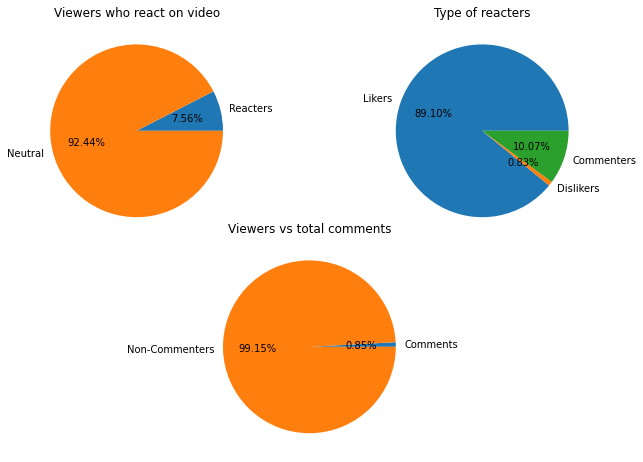

In [19]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.75, 0.75], aspect=1) # add_axes([left, bottom, width, height],aspect=1)
# Viewers who react on videos
pie_vars = ['Reacters','Neutral'];
pie_values = [df['likes'].sum()+df['dislikes'].sum(),df['views'].sum()-(df['likes'].sum()+df['dislikes'].sum())]
ax1.pie(pie_values,labels=pie_vars,autopct='%1.2f%%');
ax1.set_title('Viewers who react on video')

ax2 = fig.add_axes([0.8, 0, 0.75, 0.75], aspect=1)
# Pie chart of reacters
pie_vars = ['Likers','Dislikers','Commenters'];
pie_values = [df['likes'].sum(),df['dislikes'].sum(),df['comment'].sum()]
ax2.pie(pie_values,labels=pie_vars,autopct='%1.2f%%');
ax2.set_title('Type of reacters')

ax3= fig.add_axes([0.4, -0.75, 0.75, 0.75], aspect=1)
# Pie chart of commenters vs non commenters with respect to total viewers
pie_vars = ['Comments','Non-Commenters'];
pie_values = [df['comment'].sum(),df['views'].sum()-df['comment'].sum()]
ax3.pie(pie_values,labels=pie_vars,autopct='%1.2f%%');
ax3.set_title('Viewers vs total comments')

plt.show()